In [82]:
# Reading CSV files in PYTHON
import pandas as pd

df = pd.read_csv("C:\\Users\\Chaitanya Putcha\\Documents\\Internships\\EDL\\archive\\diabetes.csv")

import numpy as np

# Columns where 0 should be treated as missing
#cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)

print(df.head())


   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [ ]:
# Finding duplicate rows
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [ ]:
# Deal with outliers
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

In [ ]:
# Standarizing values with mean = 0 and varience = 1
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['Outcome'])
y = df['Outcome']

scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x[:5])

[[ 0.64714967  0.86192556  0.09269135  0.91498623 -0.787602    0.20935933
   0.58892732  1.44569096]
 [-0.84896998 -1.15943299 -0.33020145  0.536065   -0.787602   -0.78425421
  -0.37810147 -0.189304  ]
 [ 1.24559754  1.98490253 -0.47116571 -1.29538762 -0.787602   -1.25267202
   0.74659506 -0.10325164]
 [-0.84896998 -1.03109276 -0.33020145  0.15714377  0.2175834  -0.57133702
  -1.02278733 -1.04982767]
 [-1.14819391  0.50898994 -2.16273688  0.91498623  1.00889957  1.55783484
   2.59656319 -0.01719927]]


Accuracy:  0.8701298701298701
Mean Squared Error:  0.12987012987012986
R-squared:  0.41930618401206665


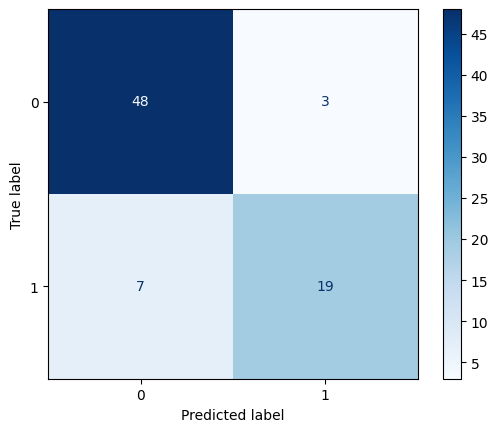

In [87]:
# ...existing code...
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Train a Random Forest model
LRmodel = LogisticRegression(random_state=42)
LRmodel.fit(x_train, y_train)

# Predict
y_pred = LRmodel.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFmodel.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
